In [2]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
path=os.path.dirname(os.path.realpath('Ordenes%20de%20compra%20PORTAL%201K%20(datos%20completo).xlsx'))
path

'C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final'

In [4]:
df=pd.read_excel('C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final\\Ordenes de compra PORTAL 1K (datos completo).xlsx')


In [5]:
df.shape

(23083, 29)

In [6]:
df.drop(labels=['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],axis=1,inplace=True)
df.shape

(23083, 26)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(22392, 26)

In [8]:
pd.set_option('max_columns', None)
df.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.0,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.0,NaN,15.500,15.500,0,155.000,155.000,2021-11-10
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10


In [9]:
df['FECHA ORDEN']=pd.to_datetime(df['FECHA ORDEN'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ENTREGA']=pd.to_datetime(df['FECHA ENTREGA'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA APROBACION']=pd.to_datetime(df['FECHA APROBACION'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ULTIMO MOVIMIENTO']=pd.to_datetime(df['FECHA ULTIMO MOVIMIENTO'],format='%Y-%m-%d',errors = 'coerce')

In [10]:
df['PRECIO UNITARIO']=df['PRECIO UNITARIO'].apply(lambda x:float(x.replace('.','')))
df['PRECIO UNITARIO + IVA']=df['PRECIO UNITARIO + IVA'].apply(lambda x:float(x.replace('.','')))
df['IVA']=df['IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL SIN IVA']=df['TOTAL SIN IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL + IVA']=df['TOTAL + IVA'].apply(lambda x:float(x.replace('.','')))

<AxesSubplot:>

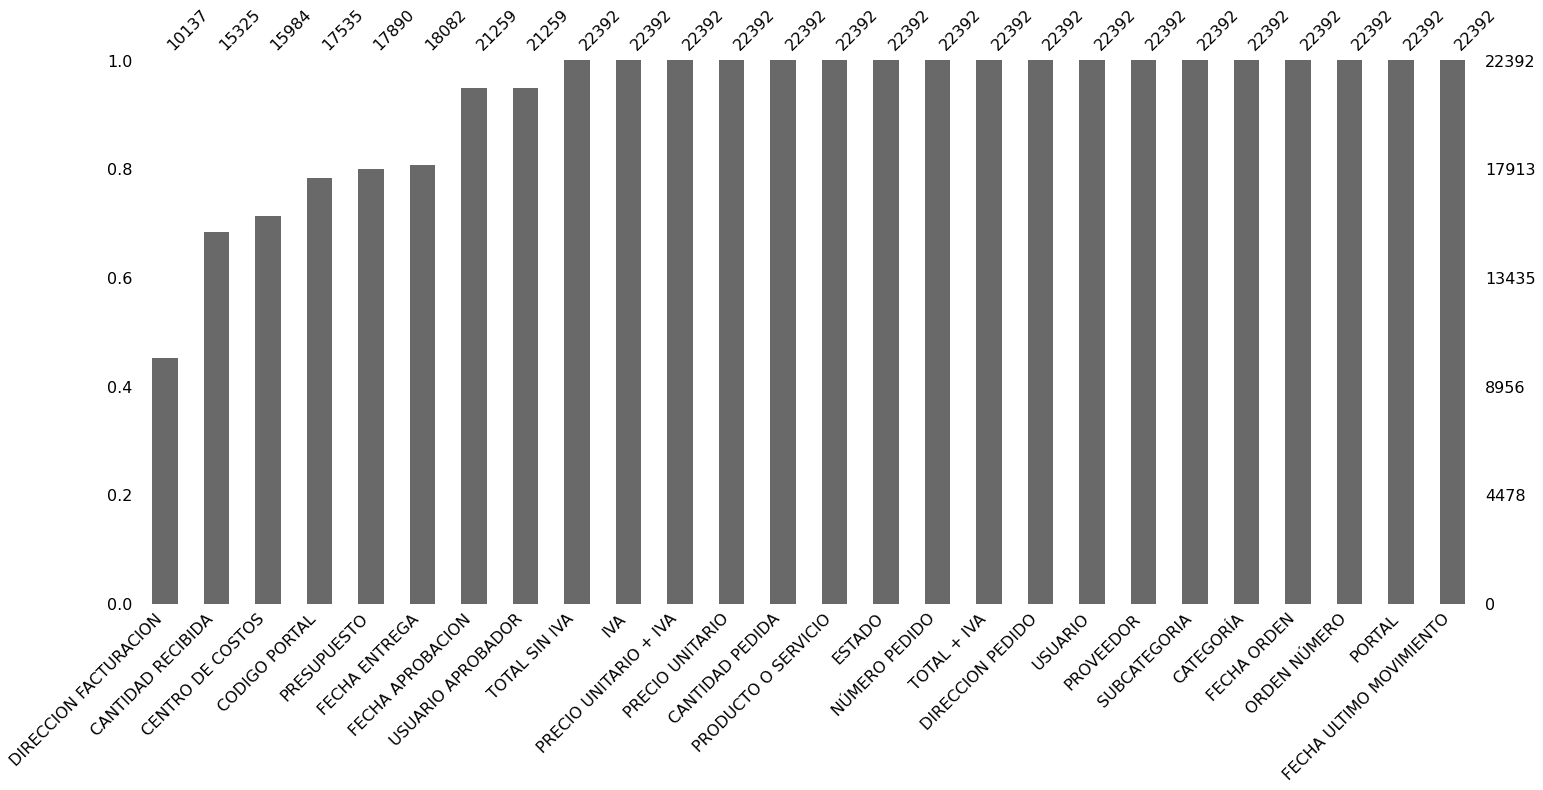

In [11]:
msn.bar(df,sort="ascending")

In [12]:
df.drop(labels=['CANTIDAD RECIBIDA','CENTRO DE COSTOS','PRESUPUESTO'],inplace=True,axis=1)

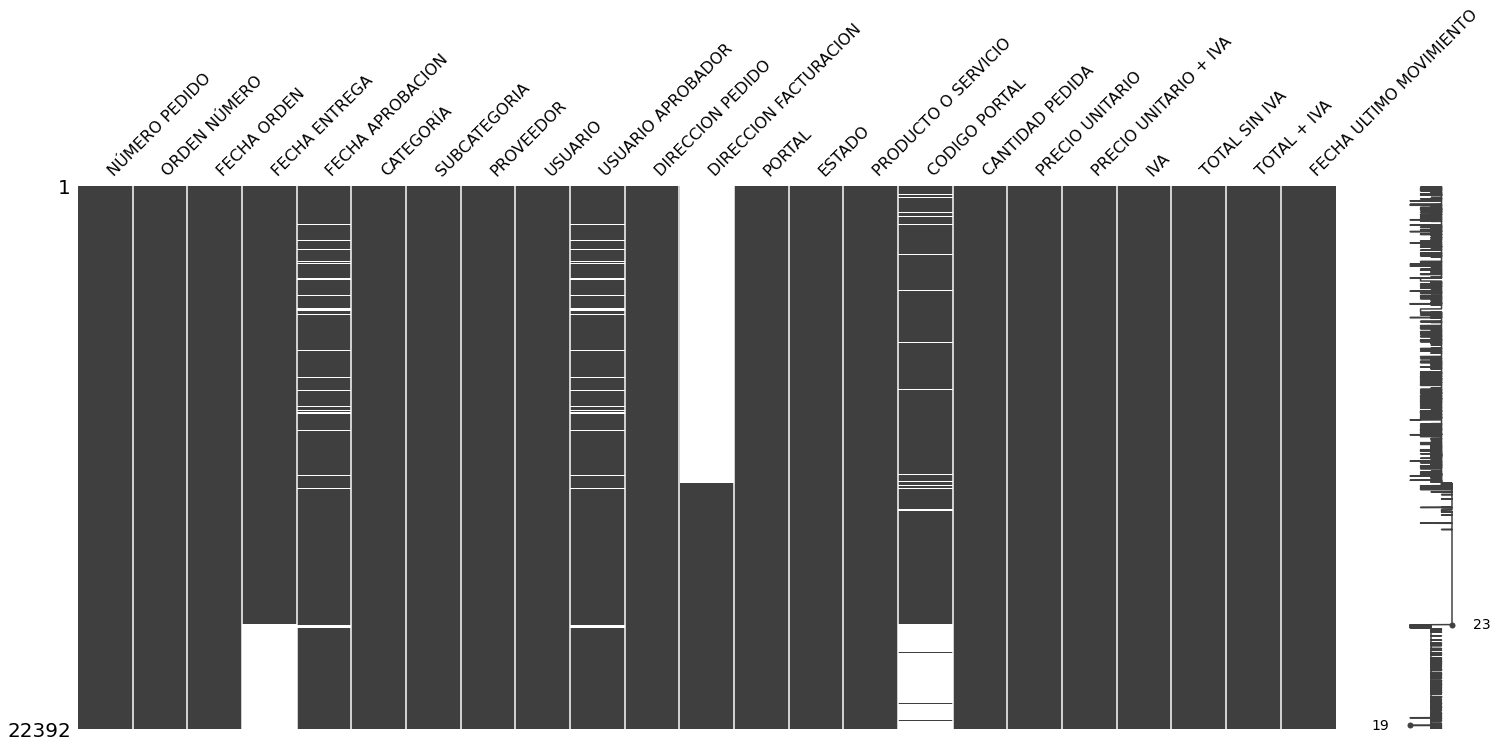

In [13]:
msn.matrix(df);

In [14]:
print(df['FECHA ORDEN'].min())
print(df['FECHA ORDEN'].max())

2018-04-30 00:00:00
2021-11-10 00:00:00


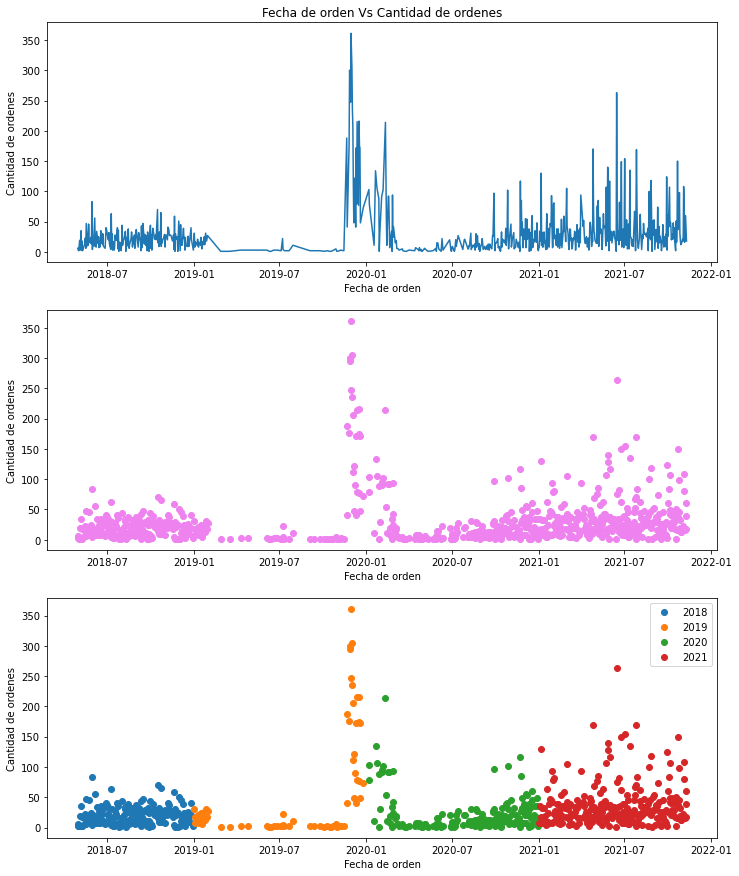

In [15]:
ordenes=df.groupby('FECHA ORDEN')['FECHA ORDEN'].count()
plt.figure(num=1,figsize=(12,15))
plt.subplot(311)
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.title('Fecha de orden Vs Cantidad de ordenes')
plt.plot(ordenes.index,ordenes);
plt.subplot(312)
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.scatter(ordenes.index,ordenes,c='violet');
plt.subplot(313)
mask2018 =  (ordenes.index <= '2018-12-31')
mask2019 = (ordenes.index> '2019-01-01') & (ordenes.index <= '2019-12-31')
mask2020 = (ordenes.index> '2020-01-01') & (ordenes.index <= '2020-12-31')
mask2021 = (ordenes.index> '2021-01-01') & (ordenes.index <= '2021-12-31')
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.scatter(ordenes.loc[mask2018].index,ordenes.loc[mask2018],label='2018');
plt.scatter(ordenes.loc[mask2019].index,ordenes.loc[mask2019],label='2019');
plt.scatter(ordenes.loc[mask2020].index,ordenes.loc[mask2020],label='2020');
plt.scatter(ordenes.loc[mask2021].index,ordenes.loc[mask2021],label='2021');
plt.legend();

In [16]:
df['dias para aprobación']=df['FECHA APROBACION']-df['FECHA ORDEN']

In [17]:
df['dias para aprobación'].describe()

count                         21259
mean     13 days 08:50:42.701914483
std      28 days 00:23:15.224548330
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 7 days 00:00:00
max               573 days 00:00:00
Name: dias para aprobación, dtype: object

In [18]:
print('Dias promedio de aprobación: ',df['dias para aprobación'].mean(skipna=True).days);
print('Maximo de días para aprobación: ',df['dias para aprobación'].max().days);

Dias promedio de aprobación:  13
Maximo de días para aprobación:  573


In [19]:
fechas=df['FECHA ORDEN'].values
fechas=pd.to_datetime(fechas)
df['Año registro']=fechas.year

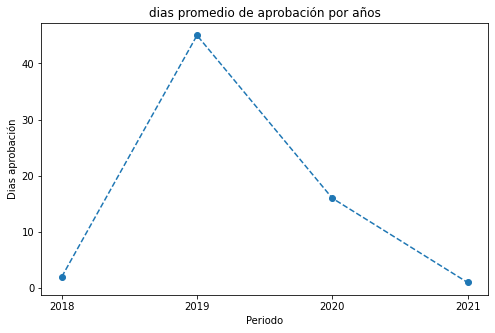

In [20]:
apro_2018=df.loc[df['Año registro']==2018,'dias para aprobación'].mean().days
apro_2019=df.loc[df['Año registro']==2019,'dias para aprobación'].mean().days
apro_2020=df.loc[df['Año registro']==2020,'dias para aprobación'].mean().days
apro_2021=df.loc[df['Año registro']==2021,'dias para aprobación'].mean().days
plt.figure(figsize=(8,5))
plt.plot(['2018','2019','2020','2021'],[apro_2018,apro_2019,apro_2020,apro_2021],'o--')
plt.title('dias promedio de aprobación por años')
plt.ylabel('Dias aprobación')
plt.xlabel('Periodo');

In [21]:
def estado(año):
    _2018=[]
    _2019=[]
    _2020=[]
    _2021=[]
    for i in año:
        recibido=0
        ordenenproceso=0
        enviado=0
        rechazada=0
        finalizado=0
        recibidop=0
        cancelado=0
        ppaprobar=0
        labels=['Recibido', 'Orden en Proceso', 'Orden Rechazada',
           'Finalizado Incompleto', 'Recibido Parcial', 'Cancelado',
           'Pendiente por Aprobar', 'Enviado']

        for x in df['FECHA ORDEN']:
            estado=df.loc[df['FECHA ORDEN']==x,'ESTADO']
            if x >= pd.to_datetime(i+'-01-31') and x<=pd.to_datetime(i+'-12-31'):
                if estado.values[0]=='Recibido':
                    recibido+=1
                elif estado.values[0]=='Orden en Proceso':
                    ordenenproceso+=1
                elif estado.values[0]=='Enviado':
                    enviado+=1
                elif estado.values[0]=='Orden Rechazada':
                    rechazada+=1
                elif estado.values[0]=='Finalizado Incompleto':
                    finalizado+=1
                elif estado.values[0]=='Recibido Parcial':
                    recibidop+=1
                elif estado.values[0]=='Cancelado':
                    cancelado+=1
                elif estado.values[0]=='Pendiente por Aprobar':
                    ppaprobar+=1
        if i=='2018':
            _2018.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2019':
            _2019.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2020':
            _2020.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2021':
            _2021.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        
    datos=pd.DataFrame({'ESTADO':labels,
                       '2018':_2018[0],
                       '2019':_2019[0],
                       '2020':_2020[0],'2021':_2021[0]})
    datos[['ESTADO','2018','2019','2020','2021']].plot(x='ESTADO', kind='bar',figsize=(10,6))
    plt.title('Estados de las ordenes')
    plt.xticks(rotation=45)

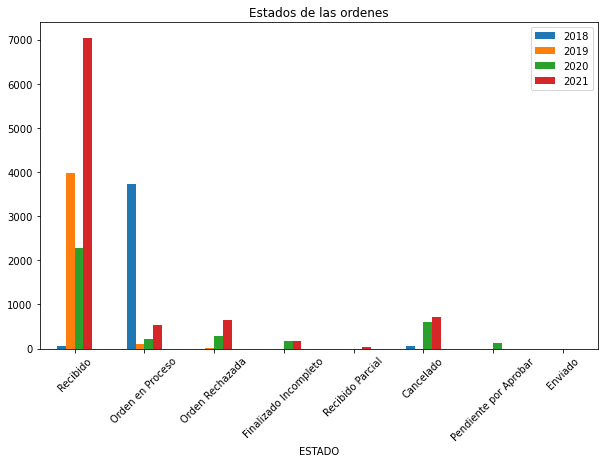

In [22]:
años=['2018','2019','2020','2021']
figure=estado(años)

In [23]:
#Funcion para mostrar el comportamiento de ventas en el tiempo de las categorias
def categorias_func(categorias,num):
    plt.figure(figsize=(12,8))
    for i in range(num):
        idx=categorias[i]
        _df=df.loc[df['CATEGORÍA']==idx,'FECHA ORDEN'].sort_values(ascending=True).value_counts()
        _df=_df.sort_index()
        
        plt.plot(_df.index,_df.values,label=idx)
        plt.xlabel('Fechas')
        plt.ylabel('Cantidad de ordenes')
        plt.title('Categorias mas vendidas en el tiempo')
        plt.legend()    

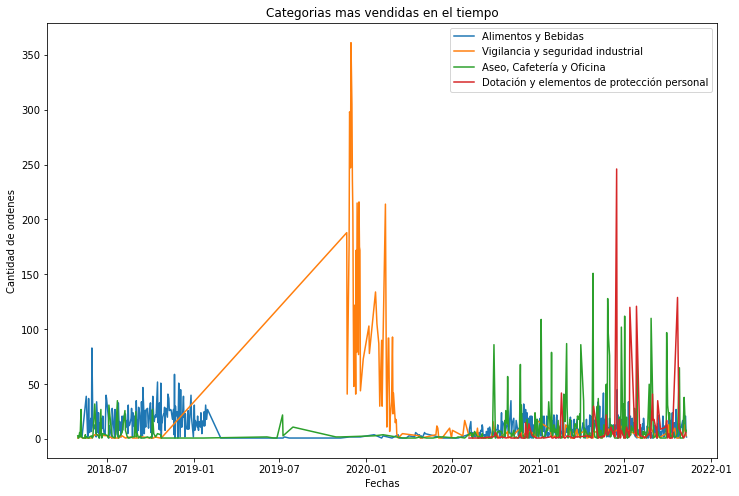

In [24]:
lista_categorias_=df['CATEGORÍA'].value_counts().index
categorias_func(lista_categorias_,4)

In [25]:
"""Fechas de aprobación que son mayores a las fechas de entregas pedidas por el cliente"""
(df['FECHA APROBACION']>df['FECHA ENTREGA']).sum()

7085

In [26]:
df['dia fecha aprobacion']=df['FECHA APROBACION'].dt.dayofweek #0 lunes, 6 domingo
df['mes fecha aprobacion']=df['FECHA APROBACION'].dt.month #Meses de aprobación 
df['semana del año aprobacion']=df['FECHA APROBACION'].dt.isocalendar().week

In [27]:
dia_apro=df['dia fecha aprobacion'].value_counts()
mes_apro=df['mes fecha aprobacion'].value_counts()
sem_apro=df['semana del año aprobacion'].value_counts()

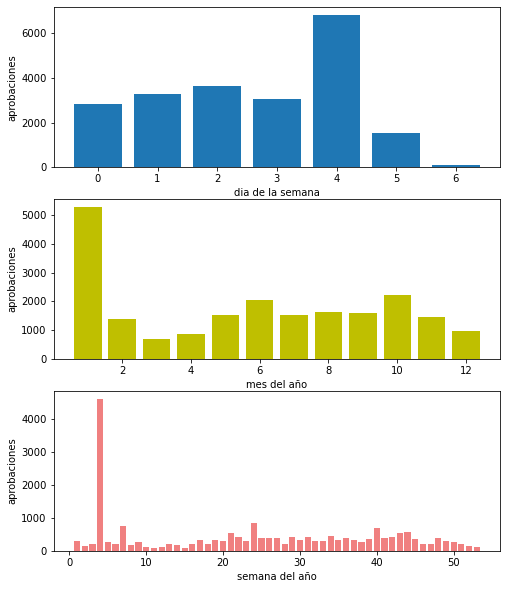

In [28]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.bar(dia_apro.index,dia_apro.values);
plt.xlabel('dia de la semana');
plt.ylabel('aprobaciones');
plt.subplot(3,1,2)
plt.bar(mes_apro.index,mes_apro.values,color='y');
plt.xlabel('mes del año');
plt.ylabel('aprobaciones');
plt.subplot(3,1,3)
plt.bar(sem_apro.index,sem_apro.values,color='lightcoral');
plt.xlabel('semana del año');
plt.ylabel('aprobaciones');

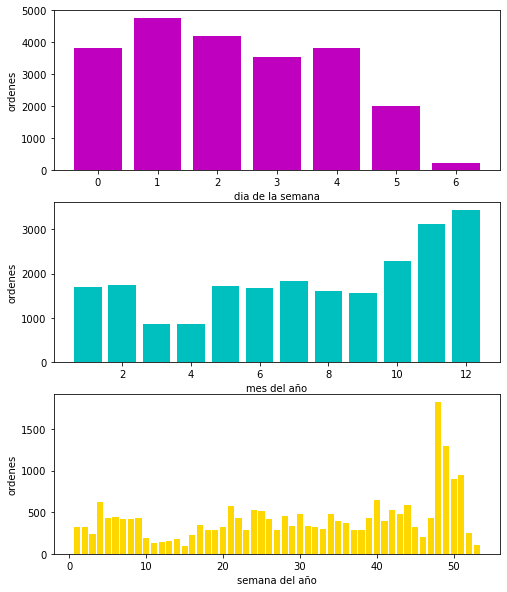

In [29]:
df['dia fecha orden']=df['FECHA ORDEN'].dt.dayofweek #0 lunes, 6 domingo
df['mes fecha orden']=df['FECHA ORDEN'].dt.month #Meses de ordbación 
df['semana del año orden']=df['FECHA ORDEN'].dt.isocalendar().week
dia_ord=df['dia fecha orden'].value_counts()
mes_ord=df['mes fecha orden'].value_counts()
sem_ord=df['semana del año orden'].value_counts()
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.bar(dia_ord.index,dia_ord.values,color='m');
plt.xlabel('dia de la semana');
plt.ylabel('ordenes');
plt.subplot(3,1,2)
plt.bar(mes_ord.index,mes_ord.values,color='c');
plt.xlabel('mes del año');
plt.ylabel('ordenes');
plt.subplot(3,1,3)
plt.bar(sem_ord.index,sem_ord.values,color='gold');
plt.xlabel('semana del año');
plt.ylabel('ordenes');

In [30]:
df['dias para aprobación']=(df['FECHA APROBACION']-df['FECHA ORDEN']).dt.days

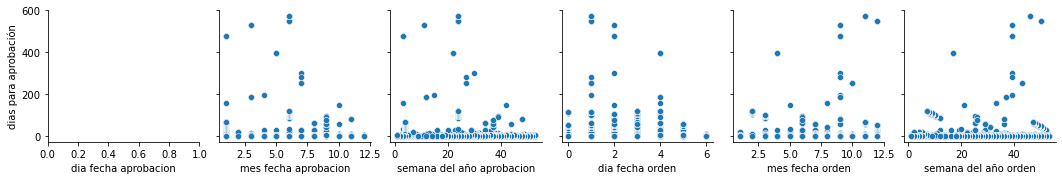

In [31]:
sns.pairplot(df,y_vars='dias para aprobación',x_vars=['dia fecha aprobacion',
       'mes fecha aprobacion', 'semana del año aprobacion','dia fecha orden',
       'mes fecha orden', 'semana del año orden']);

In [32]:
correlaciones=df.corr()
correlaciones['dias para aprobación'].sort_values(ascending=False)

dias para aprobación         1.000000
dia fecha aprobacion         0.262389
semana del año orden         0.218067
mes fecha orden              0.205292
TOTAL + IVA                  0.045720
TOTAL SIN IVA                0.041482
dia fecha orden              0.024611
IVA                         -0.018391
PRECIO UNITARIO + IVA       -0.024917
PRECIO UNITARIO             -0.025466
CANTIDAD PEDIDA             -0.039298
Año registro                -0.243956
semana del año aprobacion   -0.413286
mes fecha aprobacion        -0.428508
Name: dias para aprobación, dtype: float64

## MODELO

In [36]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random

### Variables usadas para entrenar el modelo inicial:
- Dia fecha aprobacion = Dia de la semana que se aprobo la orden
- Dia fecha orden = Dia de la semana que se hizo la orden
- Mes fecha orden = Mes del año que se realizo la orden
- semana del año orden = Semana del año que se hizo la orden
- Usuario aprobador = Usuario que aprueba la orden  
### Variable objetivo
- dias para aprobación = Fecha aprobacion - fecha orden 

In [38]:
variables=df[['dia fecha aprobacion', 'dia fecha orden',
       'mes fecha orden', 'semana del año orden','dias para aprobación','USUARIO APROBADOR']]


In [39]:
variables['dias para aprobación']=np.where(variables['dias para aprobación'].isnull()==True,variables['dias para aprobación'].mode(),
                                          variables['dias para aprobación'])


In [40]:
variables['semana del año orden']=variables['semana del año orden'].astype('float64')
variables['dias para aprobación']=variables['dias para aprobación'].astype('int64',)

In [41]:
random.seed(21)
train,test=train_test_split(variables,train_size=0.7)

In [42]:
print(train.shape)
print(test.shape)

(15674, 6)
(6718, 6)


In [ ]:
pycaret.regression.set_config(seed)

In [55]:
setup(train,target='dias para aprobación',
            train_size=0.7,
            preprocess=True,
            remove_multicollinearity=True,
             multicollinearity_threshold=0.8,
            numeric_features=['dia fecha aprobacion','dia fecha orden',
                           'mes fecha orden','semana del año orden'],
      remove_outliers=True
      
            );

,Description,Value
0,session_id,7165
1,Target,dias para aprobación
2,Original Data,"(15674, 6)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10470, 24)"


In [44]:
compare_models(fold=10,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2950,81.8245,6.7975,0.8886,0.1876,0.0129,0.2130
dt,Decision Tree Regressor,0.3367,116.6085,7.9281,0.8389,0.1910,0.0194,0.0110
knn,K Neighbors Regressor,0.4380,88.6000,8.1255,0.8931,0.2306,0.0916,0.0220
gbr,Gradient Boosting Regressor,1.3108,91.7817,8.3122,0.8841,0.4629,0.3292,0.0940
rf,Random Forest Regressor,0.4418,97.4605,8.3868,0.8690,0.2218,0.0315,0.2210
lightgbm,Light Gradient Boosting Machine,0.7854,103.0011,9.0928,0.8736,0.3617,0.1882,0.1090
ada,AdaBoost Regressor,4.7161,181.6186,13.0838,0.7477,0.7681,1.1557,0.0520
br,Bayesian Ridge,6.3321,280.2209,16.4252,0.6277,0.8723,1.7049,0.0080
ridge,Ridge Regression,6.3341,280.2038,16.4254,0.6277,0.8725,1.7069,0.0070
lar,Least Angle Regression,6.3392,280.2185,16.4279,0.6276,0.8731,1.7116,0.0070


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2852, verbose=0, warm_start=False)

In [52]:
final_model=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0849,3.5063,1.8725,0.9949,0.1005,0.0110
1,0.0100,0.0130,0.1142,1.0000,0.0460,0.0087
2,0.0795,2.1007,1.4494,0.9969,0.1423,0.0045
3,0.5988,144.0315,12.0013,0.8276,0.3037,0.0127
4,0.2705,24.6321,4.9631,0.9582,0.2466,0.0307
5,0.1093,5.4836,2.3417,0.9945,0.1721,0.0131
6,0.1555,21.9696,4.6872,0.9731,0.1612,0.0090
7,0.5929,274.2772,16.5613,0.5326,0.2492,0.0127
8,0.3200,45.7935,6.7671,0.9260,0.1991,0.0097
9,0.7285,296.4377,17.2174,0.6817,0.2549,0.0167


In [46]:
tuneM=tune_model(final_model,optimize='RMSE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8923,127.3365,11.2843,0.8136,0.3840,0.2081
1,0.6356,10.5923,3.2546,0.9802,0.4275,0.2089
2,0.7647,24.9812,4.9981,0.9627,0.4301,0.2294
3,1.2272,236.2480,15.3704,0.7172,0.4647,0.2040
4,0.8680,31.0456,5.5719,0.9474,0.4640,0.2335
5,1.1015,223.5573,14.9518,0.7763,0.4320,0.2193
6,0.9898,134.6843,11.6054,0.8354,0.4303,0.2326
7,0.8837,32.4346,5.6951,0.9447,0.4727,0.2283
8,0.7717,30.7068,5.5414,0.9504,0.4248,0.2058
9,1.2694,261.7235,16.1779,0.7190,0.4403,0.2116


In [53]:
ensamble_model=ensemble_model(final_model,optimize='RMSE',choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4151,61.0196,7.8115,0.9107,0.1658,0.0233
1,0.0375,0.1243,0.3526,0.9998,0.0983,0.0172
2,0.1893,14.2700,3.7776,0.9787,0.1842,0.0104
3,0.7190,110.6401,10.5186,0.8675,0.3221,0.0511
4,0.4101,32.3329,5.6862,0.9452,0.3042,0.0352
5,0.2719,26.5820,5.1558,0.9734,0.1903,0.0251
6,0.2117,15.0517,3.8797,0.9816,0.1898,0.0153
7,0.4079,59.7448,7.7295,0.8982,0.2689,0.0212
8,0.2988,33.6066,5.7971,0.9457,0.2022,0.0416
9,0.7547,290.4685,17.0431,0.6881,0.2171,0.0230


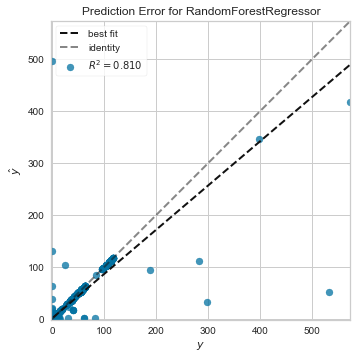

In [41]:
plot_model(final_model,plot='error')

In [50]:
predicciones=predict_model(final_model,data=test,round=2)
predicciones[['dias para aprobación','Label']]

,dias para aprobación,Label
3657,0,0.0
16377,51,51.0
9838,0,0.0
19944,0,0.0
13725,20,20.0
...,...,...
21777,0,0.0
2410,0,0.0
2576,2,2.0
21856,0,0.0


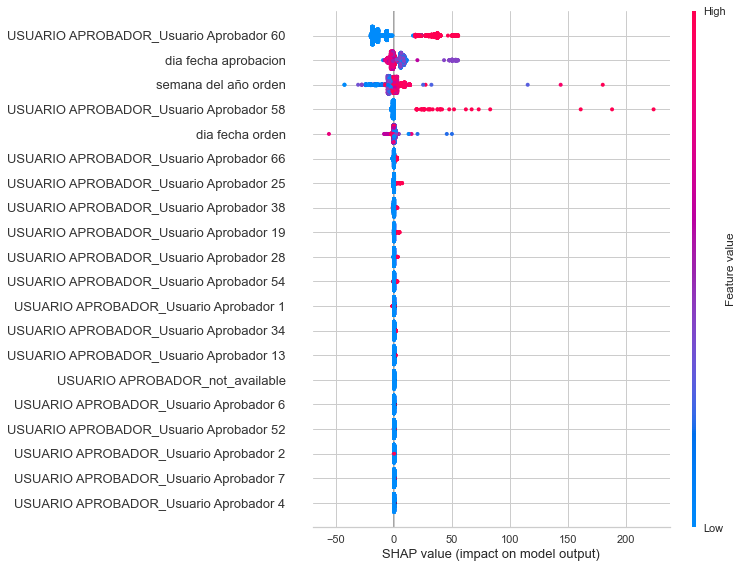

In [43]:
interpret_model(final_model)